In [1]:
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.
/Users/fruechtnicht/NOVA/src_deep-slm/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/fruechtnicht/NOVA/src_deep-slm/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/fruechtnicht/NOVA/src_deep-slm/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [4]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

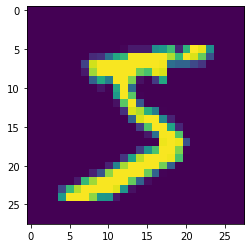

In [5]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [6]:
#check image shape
X_train[0].shape

(28, 28)

In [7]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [8]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [12]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2311 - accuracy: 0.9496 - val_loss: 0.0982 - val_accuracy: 0.9698
Epoch 2/3
19360/60000 [========>.....................] - ETA: 54s - loss: 0.0679 - accuracy: 0.9786

In [ ]:
#show predictions for the first 3 images in the test set
model.predict(X_test[:4])

In [ ]:
#show actual results for the first 3 images in the test set
y_test[:4]